# Conflicts of Bangladesh  

This project reflect the conflicts in Bangladesh according to the districts and geographic nature and catagory of the crime. A unique observation for this project is that it also includes the political groups of Bangladesh. 

source:https://data.humdata.org/dataset/ucdp-data-for-bangladesh?force_layout=desktop

## Steps for this project 
1.data cleaning 

2.data analyzing

3.visualization

In [3]:
import numpy as np 
import pandas as pd 
import folium
#https://python-visualization.github.io/folium/
import math
from folium.plugins import MarkerCluster,HeatMap,CirclePattern,LocateControl,MiniMap,Draw,PolyLineOffset
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import datetime
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt




In [4]:
df = pd.read_csv('G:/PROJECTS/data analyst portfolio/conflct data/conflict_data_bgd.csv')
df

,id,year,active_year,start_year,end_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,...,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,low,best,high
0,NaN,#date+year,NaN,#date+year+start,#date+year+end,NaN,NaN,NaN,NaN,NaN,...,NaN,#date+start,#date+end,NaN,NaN,NaN,NaN,NaN,#affected+killed,NaN
1,71663.0,2013,0.0,2013,2013,2.0,4591.0,Supporters of Awami League - Supporters of BNP,5201.0,Supporters of Awami League - Supporters of BNP,...,2.0,2013-12-13,2013-12-14,0.0,1.0,0.0,0.0,1.0,1,1.0
2,73855.0,1989,1.0,1989,1989,3.0,512.0,JSS/SB - Civilians,979.0,JSS/SB - Civilians,...,1.0,1989-09-30,1989-09-30,0.0,0.0,6.0,0.0,6.0,6,6.0
3,72633.0,1991,0.0,1991,1991,2.0,4591.0,Supporters of Awami League - Supporters of BNP,5201.0,Supporters of Awami League - Supporters of BNP,...,1.0,1991-02-28,1991-02-28,0.0,0.0,0.0,1.0,1.0,1,1.0
4,73893.0,1992,1.0,1992,1992,3.0,512.0,JSS/SB - Civilians,979.0,JSS/SB - Civilians,...,1.0,1992-05-16,1992-05-16,0.0,0.0,1.0,0.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,274922.0,2018,0.0,2018,2018,2.0,4591.0,Supporters of Awami League - Supporters of BNP,5201.0,Supporters of Awami League - Supporters of BNP,...,1.0,2018-12-30,2018-12-30,1.0,0.0,0.0,0.0,1.0,1,1.0
598,276199.0,2018,0.0,2018,2018,2.0,4591.0,Supporters of Awami League - Supporters of BNP,5201.0,Supporters of Awami League - Supporters of BNP,...,1.0,2018-12-30,2018-12-30,0.0,0.0,0.0,0.0,0.0,0,1.0
599,276205.0,2018,0.0,2018,2018,2.0,4591.0,Supporters of Awami League - Supporters of BNP,5201.0,Supporters of Awami League - Supporters of BNP,...,1.0,2018-12-30,2018-12-30,0.0,1.0,0.0,0.0,1.0,1,1.0
600,276207.0,2018,0.0,2018,2018,2.0,4591.0,Supporters of Awami League - Supporters of BNP,5201.0,Supporters of Awami League - Supporters of BNP,...,1.0,2018-12-30,2018-12-30,1.0,0.0,0.0,0.0,1.0,1,1.0


In [5]:
df = df.drop([0])

## Checking for Missing Value

In [6]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

gwnoa 0.5075  % missing values
gwnob 1.0  % missing values
source_office 0.8087  % missing values
source_date 0.8087  % missing values
source_headline 0.8087  % missing values
source_original 0.371  % missing values
adm_1 0.0333  % missing values
adm_2 0.1098  % missing values


In [7]:
df.reset_index(drop=True, inplace=True)

none of the missing values have any significance in data so removing the columns  

In [8]:
df.drop(columns=features_with_na)

,id,year,active_year,start_year,end_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,...,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,low,best,high
0,71663.0,2013,0.0,2013,2013,2.0,4591.0,Supporters of Awami League - Supporters of BNP,5201.0,Supporters of Awami League - Supporters of BNP,...,2.0,2013-12-13,2013-12-14,0.0,1.0,0.0,0.0,1.0,1,1.0
1,73855.0,1989,1.0,1989,1989,3.0,512.0,JSS/SB - Civilians,979.0,JSS/SB - Civilians,...,1.0,1989-09-30,1989-09-30,0.0,0.0,6.0,0.0,6.0,6,6.0
2,72633.0,1991,0.0,1991,1991,2.0,4591.0,Supporters of Awami League - Supporters of BNP,5201.0,Supporters of Awami League - Supporters of BNP,...,1.0,1991-02-28,1991-02-28,0.0,0.0,0.0,1.0,1.0,1,1.0
3,73893.0,1992,1.0,1992,1992,3.0,512.0,JSS/SB - Civilians,979.0,JSS/SB - Civilians,...,1.0,1992-05-16,1992-05-16,0.0,0.0,1.0,0.0,1.0,1,1.0
4,73807.0,1991,0.0,1991,1991,3.0,731.0,Government of Bangladesh - Civilians,1198.0,Government of Bangladesh - Civilians,...,1.0,1991-01-01,1991-01-01,0.0,0.0,0.0,0.0,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,274922.0,2018,0.0,2018,2018,2.0,4591.0,Supporters of Awami League - Supporters of BNP,5201.0,Supporters of Awami League - Supporters of BNP,...,1.0,2018-12-30,2018-12-30,1.0,0.0,0.0,0.0,1.0,1,1.0
597,276199.0,2018,0.0,2018,2018,2.0,4591.0,Supporters of Awami League - Supporters of BNP,5201.0,Supporters of Awami League - Supporters of BNP,...,1.0,2018-12-30,2018-12-30,0.0,0.0,0.0,0.0,0.0,0,1.0
598,276205.0,2018,0.0,2018,2018,2.0,4591.0,Supporters of Awami League - Supporters of BNP,5201.0,Supporters of Awami League - Supporters of BNP,...,1.0,2018-12-30,2018-12-30,0.0,1.0,0.0,0.0,1.0,1,1.0
599,276207.0,2018,0.0,2018,2018,2.0,4591.0,Supporters of Awami League - Supporters of BNP,5201.0,Supporters of Awami League - Supporters of BNP,...,1.0,2018-12-30,2018-12-30,1.0,0.0,0.0,0.0,1.0,1,1.0


In [9]:
df.dtypes

id                   float64
year                  object
active_year          float64
start_year            object
end_year              object
type_of_violence     float64
conflict_new_id      float64
conflict_name         object
dyad_new_id          float64
dyad_name             object
side_a_new_id        float64
gwnoa                float64
side_a                object
side_b_new_id        float64
gwnob                float64
side_b                object
number_of_sources    float64
source_article        object
source_office         object
source_date           object
source_headline       object
source_original       object
where_prec           float64
where_coordinates     object
adm_1                 object
adm_2                 object
latitude              object
longitude             object
geom_wkt              object
priogrid_gid         float64
country               object
country_id           float64
iso3                  object
region                object
event_clarity 

In [10]:
 df['latitude'] = df.latitude.astype(float)
 df['longitude'] = df.longitude.astype(float)   

In [11]:
df["geo_points"] = ""

In [12]:
for f in df.index:
    df['geo_points'][f] = (df['latitude'][f] , df['longitude'][f])
    
  

<ipython-input-12-ec600e8f54f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geo_points'][f] = (df['latitude'][f] , df['longitude'][f])


In [13]:
df["geo_points"]

0      (22.488976, 90.062732)
1      (22.643168, 92.191859)
2            (21.45, 91.9833)
3           (22.916667, 91.5)
4      (23.723056, 90.408611)
                ...          
596      (24.82713, 89.37925)
597    (22.294992, 91.978172)
598     (23.098137, 91.19562)
599    (24.559136, 88.502694)
600    (24.001218, 90.420822)
Name: geo_points, Length: 601, dtype: object

In [14]:
df.columns

Index(['id', 'year', 'active_year', 'start_year', 'end_year',
       'type_of_violence', 'conflict_new_id', 'conflict_name', 'dyad_new_id',
       'dyad_name', 'side_a_new_id', 'gwnoa', 'side_a', 'side_b_new_id',
       'gwnob', 'side_b', 'number_of_sources', 'source_article',
       'source_office', 'source_date', 'source_headline', 'source_original',
       'where_prec', 'where_coordinates', 'adm_1', 'adm_2', 'latitude',
       'longitude', 'geom_wkt', 'priogrid_gid', 'country', 'country_id',
       'iso3', 'region', 'event_clarity', 'date_prec', 'date_start',
       'date_end', 'deaths_a', 'deaths_b', 'deaths_civilians',
       'deaths_unknown', 'low', 'best', 'high', 'geo_points'],
      dtype='object')

In [15]:
for f in df['geo_points']:
    m=folium.Map(location=f, tile="stamen terrain", Zoom_start=12)
    m
mc=MarkerCluster()

## The map here shows the location of the incidents and the specific location of the crime scene in the popup

In [16]:
for idx,row in df.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(folium.Marker([row['latitude'], row['longitude']],popup=[row['where_coordinates']]))

m.add_child(mc)
a = MiniMap(tile_layer='stamen terrain', position='bottomleft')
m.add_child(a)

## Different type of features

1. Numerical features 
- Discrete 
- continuous 
2. Categorical features

In [17]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
print(numerical_features)
df[numerical_features].head()

Number of numerical variables:  23
['id', 'active_year', 'type_of_violence', 'conflict_new_id', 'dyad_new_id', 'side_a_new_id', 'gwnoa', 'side_b_new_id', 'gwnob', 'number_of_sources', 'where_prec', 'latitude', 'longitude', 'priogrid_gid', 'country_id', 'event_clarity', 'date_prec', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'low', 'high']


,id,active_year,type_of_violence,conflict_new_id,dyad_new_id,side_a_new_id,gwnoa,side_b_new_id,gwnob,number_of_sources,...,priogrid_gid,country_id,event_clarity,date_prec,deaths_a,deaths_b,deaths_civilians,deaths_unknown,low,high
0,71663.0,0.0,2.0,4591.0,5201.0,372.0,NaN,374.0,NaN,1.0,...,161821.0,771.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0
1,73855.0,1.0,3.0,512.0,979.0,285.0,NaN,1.0,NaN,-1.0,...,162545.0,771.0,1.0,1.0,0.0,0.0,6.0,0.0,6.0,6.0
2,72633.0,0.0,2.0,4591.0,5201.0,372.0,NaN,374.0,NaN,-1.0,...,160384.0,771.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,73893.0,1.0,3.0,512.0,979.0,285.0,NaN,1.0,NaN,-1.0,...,162544.0,771.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,73807.0,0.0,3.0,731.0,1198.0,143.0,771.0,1.0,NaN,-1.0,...,163981.0,771.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['year',
 'start_year',
 'end_year',
 'conflict_name',
 'dyad_name',
 'side_a',
 'side_b',
 'source_article',
 'source_office',
 'source_date',
 'source_headline',
 'source_original',
 'where_coordinates',
 'adm_1',
 'adm_2',
 'geom_wkt',
 'country',
 'iso3',
 'region',
 'date_start',
 'date_end',
 'best',
 'geo_points']

In [19]:
years = df['year'].unique()
print(type(years[0]))
print(int(df['year'].max())-int(df['year'].min())) 

<class 'str'>
29


In [20]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is year and number of categories are 30
The feature is start_year and number of categories are 30
The feature is end_year and number of categories are 30
The feature is conflict_name and number of categories are 15
The feature is dyad_name and number of categories are 16
The feature is side_a and number of categories are 10
The feature is side_b and number of categories are 9
The feature is source_article and number of categories are 394
The feature is source_office and number of categories are 55
The feature is source_date and number of categories are 95
The feature is source_headline and number of categories are 105
The feature is source_original and number of categories are 103
The feature is where_coordinates and number of categories are 251
The feature is adm_1 and number of categories are 10
The feature is adm_2 and number of categories are 65
The feature is geom_wkt and number of categories are 242
The feature is country and number of categories are 1
The feature is 

## Deaths accordding to the years 

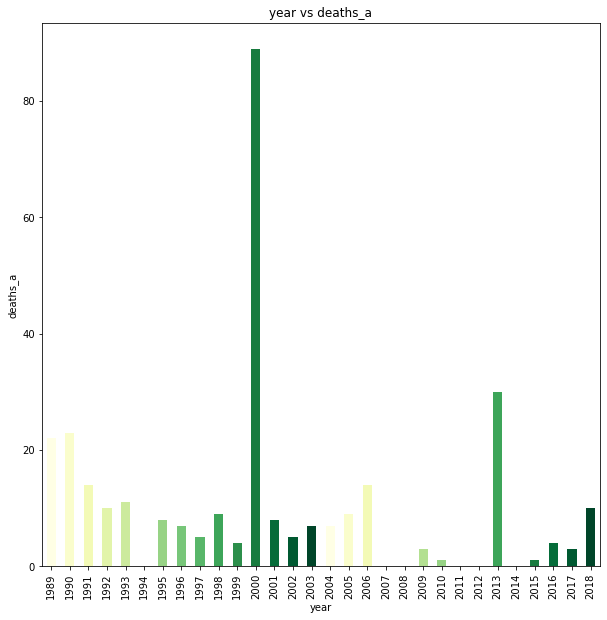

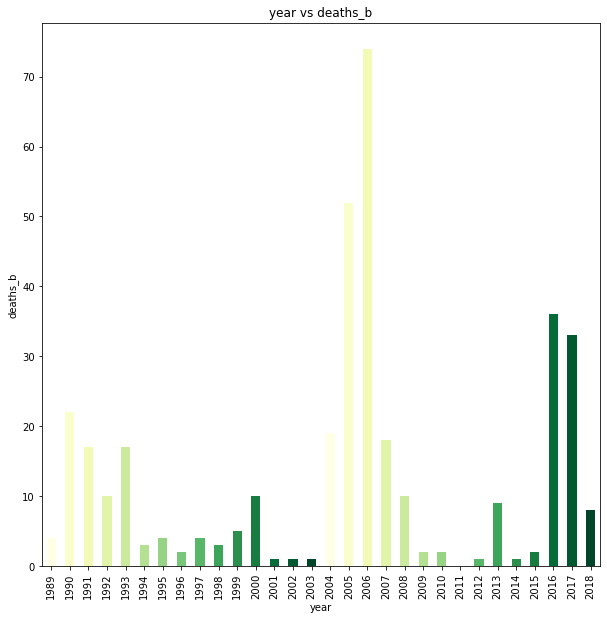

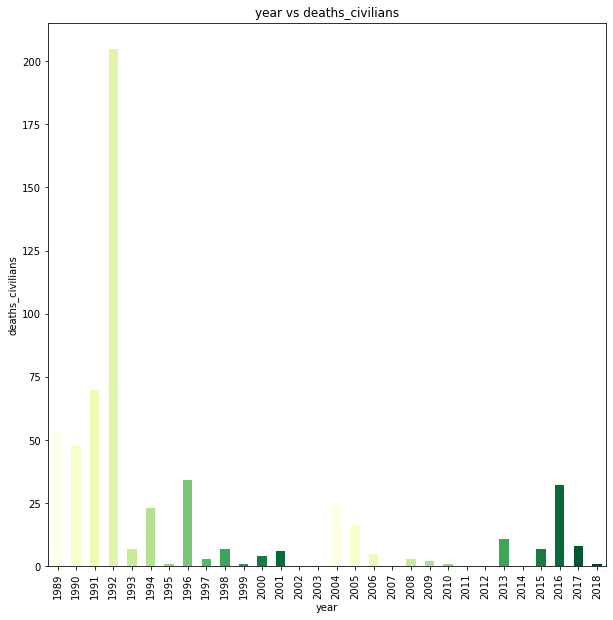

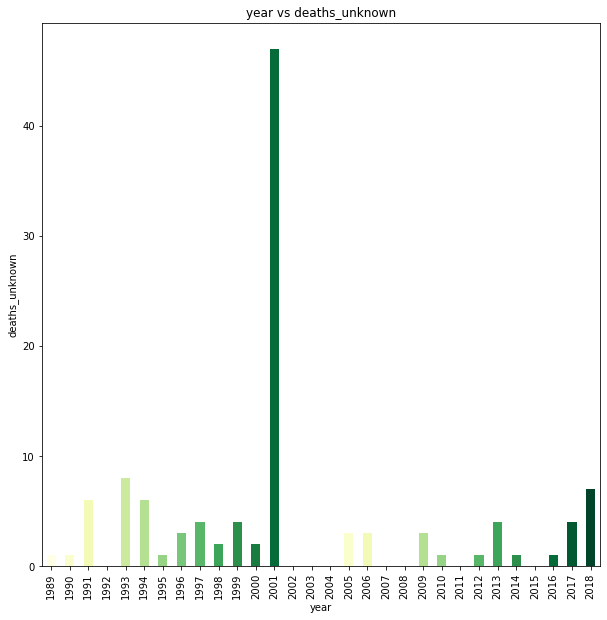

In [152]:
deaths =['deaths_a','deaths_b','deaths_civilians','deaths_unknown']
cmap = plt.get_cmap('YlGn')
colors = [cmap(i) for i in np.linspace(0, 1, 15)]
for features in deaths:
    plt.figure(1, figsize=(10,10))
    df.groupby('year')[features].sum().plot.bar(color = colors)
    plt.title("year vs "+features)
    plt.xlabel("year")
    plt.ylabel(features)
    plt.show()

## Deaths of political groups

An irony is that more people died supporting the government thatn 

In [27]:
df['side_deaths'] = df['deaths_a'] + df['deaths_b']  

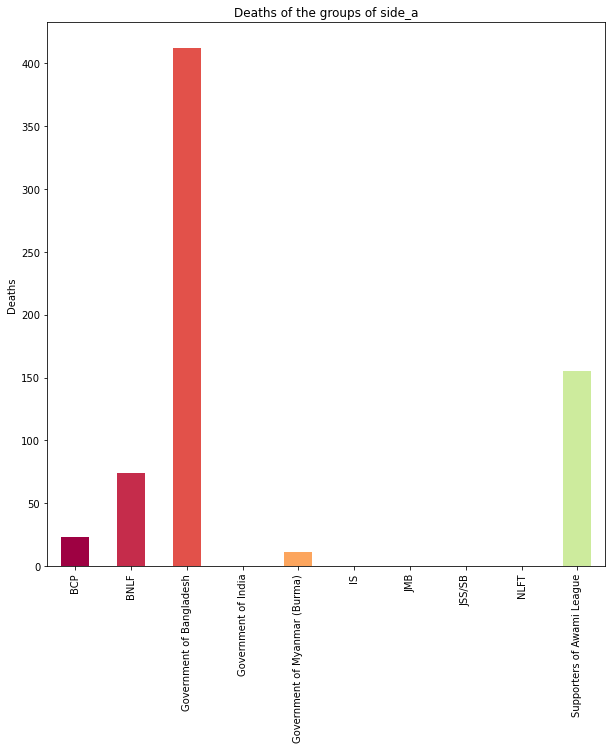

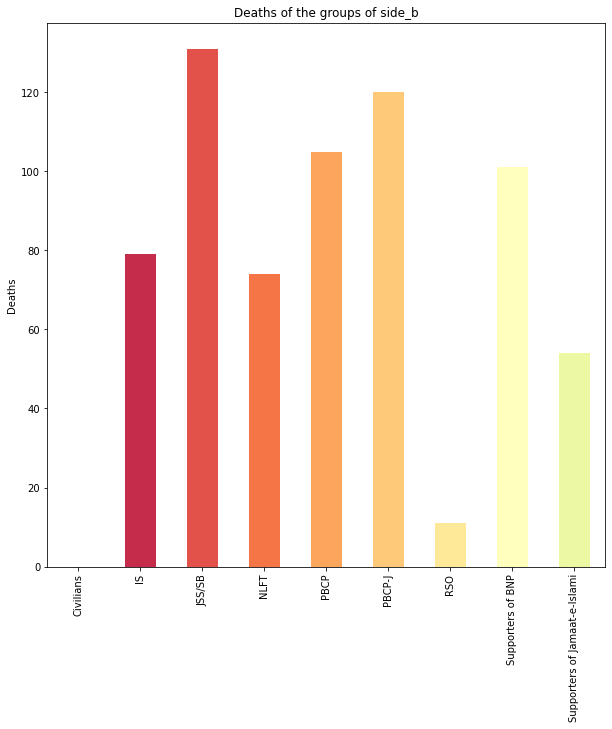

In [136]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 15)]
for feature in ['side_a','side_b']:
    data=df.copy()
    data.sort_values('side_a', inplace = True)
    plt.figure(1, figsize=(10,10))
    data.groupby(feature)['side_deaths'].sum().plot.bar(color = colors) 
    plt.title("Deaths of the groups of "+feature)
    plt.ylabel('Deaths')
    plt.xlabel('')
    
    plt.show()


In [ ]:
main_features = [feature for feature in numerical_features if 'id' not in feature ]

In [ ]:
print(main_features)

In [65]:
data=df.copy()
id_feature = [feature for feature in numerical_features if 'id' in feature]
print(id_feature)
for f in id_feature:
    type(f)
    data = data.drop(f,axis=1)
    
print(data.columns)

['id', 'conflict_new_id', 'dyad_new_id', 'side_a_new_id', 'side_b_new_id', 'priogrid_gid', 'country_id']
Index(['year', 'active_year', 'start_year', 'end_year', 'type_of_violence',
       'conflict_name', 'dyad_name', 'gwnoa', 'side_a', 'gwnob', 'side_b',
       'number_of_sources', 'source_article', 'source_office', 'source_date',
       'source_headline', 'source_original', 'where_prec', 'where_coordinates',
       'adm_1', 'adm_2', 'latitude', 'longitude', 'geom_wkt', 'country',
       'iso3', 'region', 'event_clarity', 'date_prec', 'date_start',
       'date_end', 'deaths_a', 'deaths_b', 'deaths_civilians',
       'deaths_unknown', 'low', 'best', 'high', 'geo_points', 'side_deaths'],
      dtype='object')


In [69]:
title_type = df.groupby('adm_1')['high'].agg('count')
print(title_type)

adm_1
Barisal Division        11
Barisāl Division         3
Chittagong Division    194
Dhaka Division          85
Khulna Division        164
Mymensingh division      1
Rajshahi Division       89
Rangpur Division        14
Sylhet Division         20
Name: high, dtype: int64


In [72]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

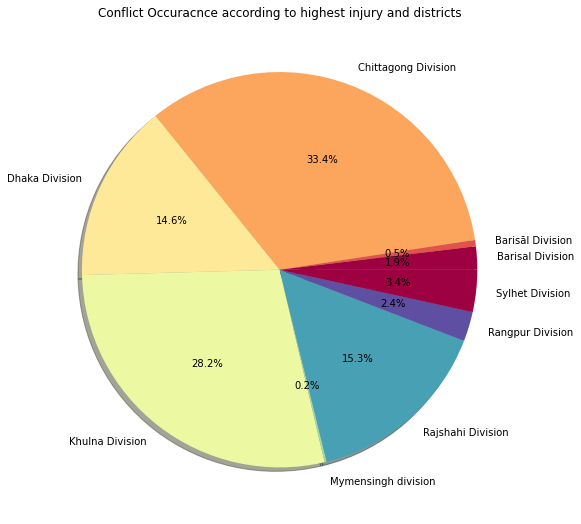

In [114]:
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Conflict Occuracnce according to highest injury and districts')
divisional_piechart = plt.pie(title_type, labels=title_type.index, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [166]:
title = df.groupby(['year'])['high'].agg('count')

In [170]:
title


year
1989    20
1990    27
1991    36
1992    29
1993    18
1994     6
1995    13
1996    23
1997    11
1998    11
1999    18
2000     8
2001    27
2002     4
2003    15
2004    37
2005    66
2006    74
2007    13
2008    11
2009     9
2010     8
2011     1
2012     2
2013    38
2014     2
2015     8
2016    25
2017    23
2018    18
Name: high, dtype: int64

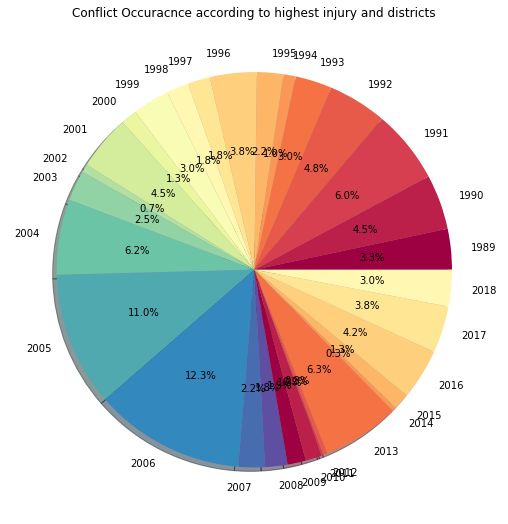

In [172]:
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]
plt.subplot(the_grid[0, 1], aspect=1, title='Conflict Occuracnce according to highest injury and districts')
divisional_piechart = plt.pie(title, labels=title.index, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()